In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
# Step 1: Standardization (Mean centering and scaling)
def standardize_data(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_standardized = (X - mean) / std_dev
    return X_standardized

X_standardized = standardize_data(X)

In [7]:
# Step 2: Compute Covariance Matrix
def compute_covariance_matrix(X):
    return np.cov(X.T)  # Covariance matrix (features along columns)

cov_matrix = compute_covariance_matrix(X_standardized)

# Step 3: Compute Eigenvalues and Eigenvectors
def compute_eigenvalues_and_vectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Eigen decomposition
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = compute_eigenvalues_and_vectors(cov_matrix)

# Step 4: Sort Eigenvalues and Corresponding Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

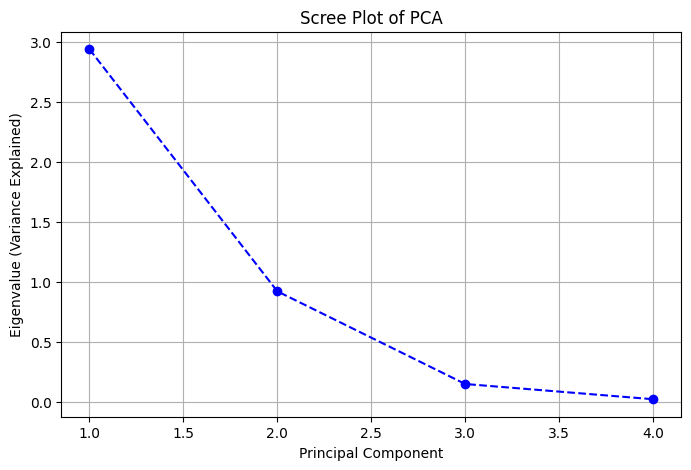

In [8]:
# Step 5: Scree Plot (to decide how many components to keep)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue (Variance Explained)")
plt.title("Scree Plot of PCA")
plt.grid()
plt.show()

In [9]:
# Step 6: Select Top k Principal Components (Reduce Dimensions)
k = 2  # Reduce to 2 dimensions for visualization
top_eigenvectors = eigenvectors[:, :k]  # Take first k eigenvectors

# Step 7: Transform the Original Data
X_pca = X_standardized.dot(top_eigenvectors)


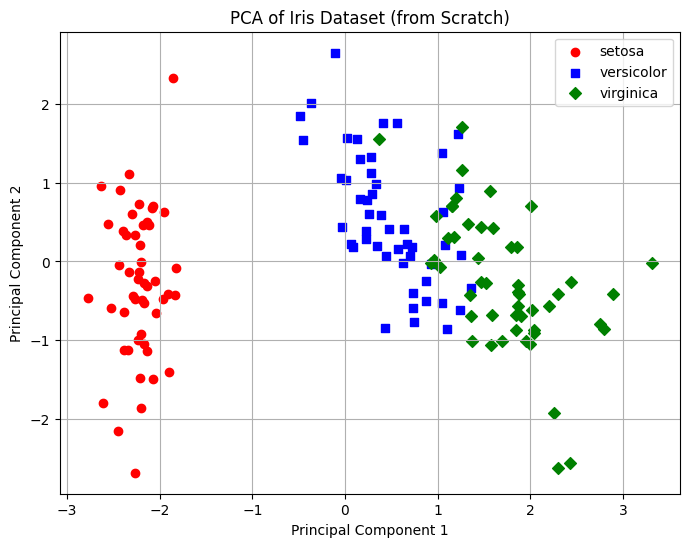

In [10]:
# Step 8: Data Visualization in 2D
plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('o', 's', 'D'), ('red', 'blue', 'green')):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], marker=marker, color=color, label=iris.target_names[label])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (from Scratch)")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Step 9: Train Logistic Regression on PCA-Reduced Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs")
log_reg.fit(X_train, y_train)

# Step 10: Evaluate the Model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy after PCA: {accuracy * 100:.2f}%")

Logistic Regression Accuracy after PCA: 93.33%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [12]:
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 93.33%


Precision (weighted): 0.9436
Recall (weighted): 0.9333
F1-score (weighted): 0.9319

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


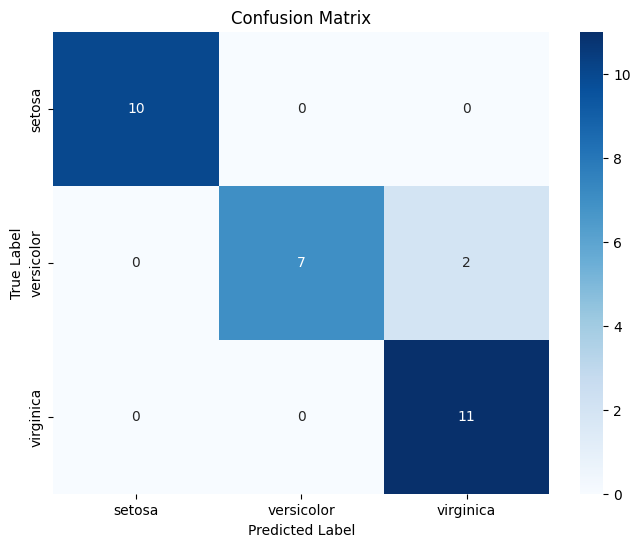

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate Precision
# 'weighted' calculates metrics for each label, and finds their average weighted by support (the number of true instances for each label).
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision (weighted): {precision:.4f}")

# Calculate Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall (weighted): {recall:.4f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score (weighted): {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Classification report

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

